In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

PART 1: Prepare the Data

In [3]:
# Import the data
# Data loading
file_path = Path("myopia.csv")
df= pd.read_csv(file_path)
df.head(10)


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [4]:
# List dataframe data types, make sure they align with the type of data stored on each column
df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [5]:
# Identify all the possible values in the class column
df['MYOPIC'].unique()

array([1, 0], dtype=int64)

In [6]:
# But since we don't actually need the MYOPIC column for unsupervised learning...
# Drop the Myopic column
new_df = df.drop(["MYOPIC"], axis='columns')
#create dataframe
labels = df['MYOPIC']
new_df.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0


In [7]:
# Save the cleaned DataFrame as a new CSV file for further use
file_path = Path("new_myopia_data.csv")
new_df.to_csv(file_path, index=False)


In [12]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
myopia_scaled = scaler.fit_transform(new_df)
print(myopia_scaled[0:14])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]
 [-0.42021911  1.50779097 -0.5249931  -1.54047905  0.0942193  -0.02528499
  -0.2453042   1.04507157 -0.03443904 -0.22140908  1

In [13]:
myopia_scaled.shape

(618, 14)

Part 2: Apply Dimensionality Reduction

In [15]:
# Applying PCA to reduce dimensions to 90%. This means the desired explained variance is 90% in dimesionality reduction.

# Initialize PCA model
pca = PCA(n_components= 0.90)

# Get two principal components for the iris data.
myopia_pca = pca.fit_transform(myopia_scaled)


In [16]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(data= myopia_pca, columns=["principal component 1", "principal component 2",
                                                                "principal component 3","principal component 4",
                                                                 "principal component 5","principal component 6",
                                                                 "principal component 7","principal component 8",
                                                                 "principal component 9", "principal component 10"])

df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [17]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [18]:
#Shape of feature
df_myopia_pca.shape

(618, 10)

In part 1, I scaled the data and used shape of feature to show a before and after of PCA. Before there was 14 columns and after pca, we see the clear reduction from 14 to 10 columns above.

Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.

In [20]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=50)

In [21]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_myopia_pca)

C:\Users\lorai\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [22]:
#the dataset has 2 columns
tsne_features.shape

(618, 2)

In [23]:
# Prepare to plot the dataset

# The first column of transformed features
df_myopia_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_myopia_pca['y'] = tsne_features[:,1]

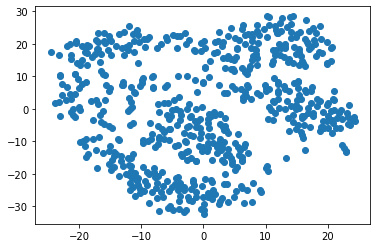

In [24]:
# Visualize the clusters
plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'])
plt.show()

In [25]:
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

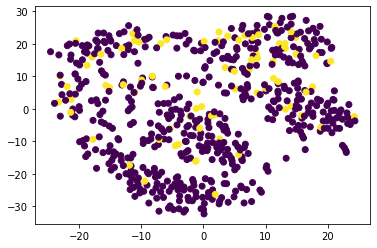

In [26]:
# Visualize the clusters with color
plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'], c=labels)
plt.show()

There are no distinctive cluster as we can see the overlapping. 

Part 3: Perform a Cluster Analysis with K-means
Create an elbow plot to identify the best number of clusters. Make sure to do the following:

Use a for loop to determine the inertia for each k between 1 through 10.

If possible, determine where the elbow of the plot is, and at which value of k it appears.

C:\Users\lorai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


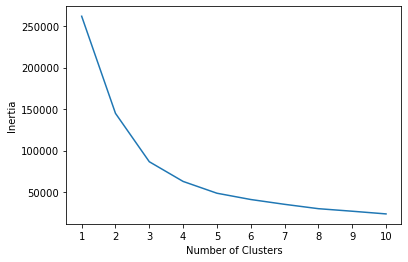

In [27]:
inertia = []
# Same as k = list(range(1, 11)), reference lecture
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

The best possible number of clusters for K appears to be 3 in the above chart.

PART 4: MAKE A RECOMMENDATION
    
After carefully analyzing each cluster, you cannot conclude the best way to predict myopia by there distinctive groups. The performance of the k-means is only as good as the initilization, thus technique can be improved and repeating the algorithm in hopes of finding distinctive groups. 